In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv("./data/wholetime.csv")

/var/folders/pm/4cgtm7w90fbgczj718s4vvk40000gn/T/ipykernel_8729/4197093779.py:1: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/wholetime.csv")


In [14]:
# Get the node_list, edge_list and timestamp
def return_nmtd(df):
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])
    # started_atで昇順にソート
    df = df.sort_values(by='started_at')
    current_timestamp = df['started_at'].min()
    end_timestamp = df["started_at"].max()
    interval = timedelta(days=1)

    node_list = []
    edge_list = []
    timestamp = []
    distance_list = [] # 1日の移動距離の平均

    while current_timestamp <= end_timestamp:
        timestamp.append(current_timestamp)
        next_timestamp = current_timestamp + interval
        df_tmp = df[(df['started_at'] >= current_timestamp) & (df['started_at'] < next_timestamp)]

        # node_listにはユニークなstart_station_idを追加
        node_list.append(len(df_tmp['start_station_id'].unique()))

        # edge_listにはdf_tmpの行数を追加
        edge_list.append(len(df_tmp))

        # distance_listには1日の移動距離の平均を追加
        distance_list.append(df_tmp['distance'].mean())

        current_timestamp = next_timestamp

    # node_listとedge_listで0の値を削除
    node_list = np.array(node_list)
    edge_list = np.array(edge_list)
    timestamp = np.array(timestamp)
    active_node_list = node_list
    edge_list = edge_list[edge_list != 0]
    # timestamp = timestamp[:len(node_list)]
    distance_list = np.array(distance_list)
    # distance_list = distance_list[distance_list != 0]
    
    return active_node_list, edge_list, timestamp, distance_list

In [12]:
df_n, df_e, df_t, df_d = return_nmtd(df)

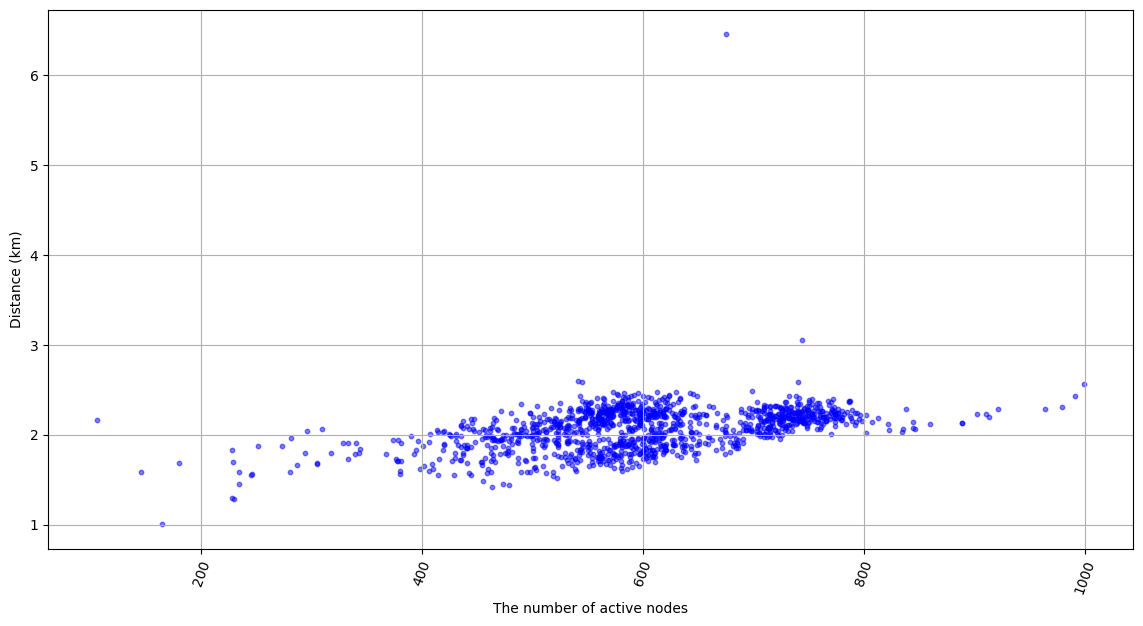

In [15]:
# df_nとdf_dをプロット
plt.figure(figsize=(14,7))
plt.scatter(df_n, df_d, s=10, c='blue', alpha=0.5)
plt.xticks(rotation=70)
plt.xlabel("The number of active nodes")
plt.ylabel("Distance (km)")
plt.grid()
plt.show()



In [13]:
print(len(df_n))
print(len(df_d))

1278
1278
